Link para os dados:
https://ec.europa.eu/eurostat/databrowser/view/urb_cfermor/default/table?lang=en&category=urb.urb_cgc

In [201]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [202]:
dados = pd.read_csv('Arquivos/demo_frate_tabular.tsv', sep='\t')
dados.head()

,"freq,unit,age,agedef,geo\TIME_PERIOD",1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,"A,NR,TOTAL,COMPLET,AD",:,:,:,:,:,:,:,:,:,...,:,:,:,:,:,:,:,:,:,:
1,"A,NR,TOTAL,COMPLET,AL",:,:,:,:,:,:,:,:,:,...,1.72964,1.73440,1.59469,1.53794,1.47540,1.36807,:,1.33672,1.30726,1.20643
2,"A,NR,TOTAL,COMPLET,AM",:,:,:,:,:,:,:,:,:,...,:,:,1.62067,1.62480,1.56087,1.56746,1.60075,:,:,:
3,"A,NR,TOTAL,COMPLET,AT",2.69258,2.78429,2.79853,2.81888,2.79138,2.69995,2.65982,2.61916,2.58385,...,1.43547,1.46365,1.49020,1.52920,1.51755,1.47446,1.46062,1.43550,1.47612,1.40927
4,"A,NR,TOTAL,COMPLET,AZ",:,:,:,:,:,:,:,:,:,...,1.97578,1.96592,1.94264,1.89964,1.75000,1.73095,1.81040,:,:,:


Lendo o arquivo e separando a primeira coluna em tres novas colunas

In [203]:
def explode_column(df):
    new_columns = df['freq,unit,age,agedef,geo\\TIME_PERIOD'].str.split(',', expand=True)

    new_columns.rename({0:'Freq', 1: 'Unit', 2: 'Age', 3:'Agedef', 4:'Geo'}, axis=1, inplace=True)

    df.drop(columns='freq,unit,age,agedef,geo\\TIME_PERIOD', axis=1, inplace=True)

    df=pd.concat([new_columns, df], axis=1)
    return df

dados = explode_column(dados)
dados.head()

,Freq,Unit,Age,Agedef,Geo,1960,1961,1962,1963,1964,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,A,NR,TOTAL,COMPLET,AD,:,:,:,:,:,...,:,:,:,:,:,:,:,:,:,:
1,A,NR,TOTAL,COMPLET,AL,:,:,:,:,:,...,1.72964,1.73440,1.59469,1.53794,1.47540,1.36807,:,1.33672,1.30726,1.20643
2,A,NR,TOTAL,COMPLET,AM,:,:,:,:,:,...,:,:,1.62067,1.62480,1.56087,1.56746,1.60075,:,:,:
3,A,NR,TOTAL,COMPLET,AT,2.69258,2.78429,2.79853,2.81888,2.79138,...,1.43547,1.46365,1.49020,1.52920,1.51755,1.47446,1.46062,1.43550,1.47612,1.40927
4,A,NR,TOTAL,COMPLET,AZ,:,:,:,:,:,...,1.97578,1.96592,1.94264,1.89964,1.75000,1.73095,1.81040,:,:,:


Verificando dados das colunas criadas

In [204]:
for column in dados[['Freq', 'Unit', 'Agedef']]:
    print (f"{dados[column].value_counts()} ------------------------------ \n")

Freq
A    2565
Name: count, dtype: int64 ------------------------------ 

Unit
NR    2565
Name: count, dtype: int64 ------------------------------ 

Agedef
COMPLET    2565
Name: count, dtype: int64 ------------------------------ 


Eliminando colunas criadas que não possui dados relevantes

In [205]:
dados.drop(columns=['Freq', 'Unit', 'Agedef'], inplace=True)
dados.head()

,Age,Geo,1960,1961,1962,1963,1964,1965,1966,1967,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,TOTAL,AD,:,:,:,:,:,:,:,:,...,:,:,:,:,:,:,:,:,:,:
1,TOTAL,AL,:,:,:,:,:,:,:,:,...,1.72964,1.73440,1.59469,1.53794,1.47540,1.36807,:,1.33672,1.30726,1.20643
2,TOTAL,AM,:,:,:,:,:,:,:,:,...,:,:,1.62067,1.62480,1.56087,1.56746,1.60075,:,:,:
3,TOTAL,AT,2.69258,2.78429,2.79853,2.81888,2.79138,2.69995,2.65982,2.61916,...,1.43547,1.46365,1.49020,1.52920,1.51755,1.47446,1.46062,1.43550,1.47612,1.40927
4,TOTAL,AZ,:,:,:,:,:,:,:,:,...,1.97578,1.96592,1.94264,1.89964,1.75000,1.73095,1.81040,:,:,:


Incluindo uma coluna com os nomes dos paises a partir dos codigos

In [206]:
def name_country(df):
    codigo = pd.read_csv('Arquivos/Mother_Age/Codigos.csv')

    df=pd.merge(df, codigo, right_on='Cod_Country', left_on='Geo', how='left')
    df.drop(columns=['Cod_Country', 'Geo'], axis=1, inplace=True)

    df=df[[df.columns[-1]] + [col for col in df.columns if col != df.columns[-1]]]

    return df

dados=name_country(dados)
dados.head()

,Country,Age,1960,1961,1962,1963,1964,1965,1966,1967,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Andorra,TOTAL,:,:,:,:,:,:,:,:,...,:,:,:,:,:,:,:,:,:,:
1,Albania,TOTAL,:,:,:,:,:,:,:,:,...,1.72964,1.73440,1.59469,1.53794,1.47540,1.36807,:,1.33672,1.30726,1.20643
2,Armenia,TOTAL,:,:,:,:,:,:,:,:,...,:,:,1.62067,1.62480,1.56087,1.56746,1.60075,:,:,:
3,Austria,TOTAL,2.69258,2.78429,2.79853,2.81888,2.79138,2.69995,2.65982,2.61916,...,1.43547,1.46365,1.49020,1.52920,1.51755,1.47446,1.46062,1.43550,1.47612,1.40927
4,Azerbaijan,TOTAL,:,:,:,:,:,:,:,:,...,1.97578,1.96592,1.94264,1.89964,1.75000,1.73095,1.81040,:,:,:


Tirando carateres das colunas de ano

In [207]:
def replace_caracter(df):
    columns_years=list(dados.columns[2:66])
    caractere_remove = [' ', 'b', 'e', 'p', ':', '.']
    for coluna in dados[columns_years].columns:
        for caractere in caractere_remove:
            df[coluna] = df[coluna].str.replace(caractere, '')
        
    columns_years=list(dados.columns[2:66])
    df[columns_years] = df[columns_years].replace('', None)
    df[columns_years] = df[columns_years].fillna(0)
    df[columns_years] = df[columns_years].astype(float)
    
    return df

dados = replace_caracter(dados)
dados.head()

,Country,Age,1960,1961,1962,1963,1964,1965,1966,1967,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Andorra,TOTAL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Albania,TOTAL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,172964.0,173440.0,159469.0,153794.0,147540.0,136807.0,0.0,133672.0,130726.0,120643.0
2,Armenia,TOTAL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,162067.0,162480.0,156087.0,156746.0,160075.0,0.0,0.0,0.0
3,Austria,TOTAL,269258.0,278429.0,279853.0,281888.0,279138.0,269995.0,265982.0,261916.0,...,143547.0,146365.0,149020.0,152920.0,151755.0,147446.0,146062.0,143550.0,147612.0,140927.0
4,Azerbaijan,TOTAL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,197578.0,196592.0,194264.0,189964.0,175000.0,173095.0,181040.0,0.0,0.0,0.0


Verificando os valores da coluna Age e configurando em categorias, assim como eliminando as linhas igual a "TOTAL"

In [208]:
dados.Age.unique()

array(['TOTAL', 'Y10-14', 'Y15', 'Y15-19', 'Y16', 'Y17', 'Y18', 'Y19',
       'Y20', 'Y20-24', 'Y21', 'Y22', 'Y23', 'Y24', 'Y25', 'Y25-29',
       'Y26', 'Y27', 'Y28', 'Y29', 'Y30', 'Y30-34', 'Y31', 'Y32', 'Y33',
       'Y34', 'Y35', 'Y35-39', 'Y36', 'Y37', 'Y38', 'Y39', 'Y40',
       'Y40-44', 'Y41', 'Y42', 'Y43', 'Y44', 'Y45', 'Y45-49', 'Y46',
       'Y47', 'Y48', 'Y49', 'Y_GE50'], dtype=object)

In [209]:
dados.query('Age != "TOTAL"', inplace=True)
dados['Age']=dados['Age'].str.slice(start=1)

def category_age(indice_ur, df):
    unique_values = df['Age'].unique()
    categorys_teen = unique_values[:7]
    categorys_risk = unique_values[-19:]
    
    if indice_ur in categorys_teen:
        return '19 or less'
    elif indice_ur in categorys_risk:
        return '35 or more'
    else:
        return 'Between 20 and 34'
    
    
dados['Age_Category']=dados['Age'].apply(category_age, args=(dados,))

def organize_columns(df, n=2):
    df = df[[col for col in df.columns if col != df.columns[-1]][:n] + [df.columns[-1]] + [col for col in df.columns if col != df.columns[-1]][n:]]
    return df
              
dados=organize_columns(dados, 1)          
dados.head()

,Country,Age_Category,Age,1960,1961,1962,1963,1964,1965,1966,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
57,Andorra,19 or less,10-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58,Albania,19 or less,10-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.0,19.0,21.0,22.0,21.0,26.0,0.0,17.0,29.0,21.0
59,Armenia,19 or less,10-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,5.0,2.0,5.0,3.0,0.0,0.0,0.0
60,Austria,19 or less,10-14,11.0,14.0,8.0,16.0,14.0,9.0,10.0,...,5.0,7.0,7.0,4.0,5.0,5.0,1.0,1.0,3.0,1.0
61,Azerbaijan,19 or less,10-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Transformando as colunas em linhas

In [210]:
def column_to_line(df):
    columns_years=list(df.columns[-63:])
    df = df.melt(id_vars=['Country', 'Age_Category', 'Age'], value_vars= columns_years, var_name='Year', value_name='Count')
    df['Year'] = df['Year'].astype(int)
    return df

dados=column_to_line(dados)
dados.head()

,Country,Age_Category,Age,Year,Count
0,Andorra,19 or less,10-14,1960,0.0
1,Albania,19 or less,10-14,1960,0.0
2,Armenia,19 or less,10-14,1960,0.0
3,Austria,19 or less,10-14,1960,11.0
4,Azerbaijan,19 or less,10-14,1960,0.0


Limpando linhas com valores 0 no ano e retirando paises invalidos

In [217]:
dados = dados[~dados['Country'].str.contains('Euro')]
dados = dados.loc[(dados['Count'] != 0) & (dados['Country'] != "Germany including former GDR") & (dados['Country'] != "Metropolitan France")]
dados.Country.unique()

array(['Austria', 'Belgium', 'Bulgaria', 'Switzerland', 'Czechia',
       'Denmark', 'Estonia', 'Greece', 'Spain', 'Finland', 'Hungary',
       'Ireland', 'Iceland', 'Norway', 'Portugal', 'Romania', 'Sweden',
       'Slovakia', 'United Kingdom', 'Italy', 'Lithuania', 'Luxembourg',
       'Netherlands', 'Malta', 'Slovenia', 'Cyprus', 'Poland',
       'North Macedonia', 'France', 'Germany', 'Latvia', 'Serbia',
       'Liechtenstein', 'Croatia', 'Albania', 'Montenegro', 'Belarus',
       'Georgia', 'Russia', 'Ukraine', 'Armenia', 'Azerbaijan', 'Moldova',
       'Andorra', 'Türkiye', 'San Marino', 'Kosovo*'], dtype=object)

Filtrando apenas os anos entre 1980 e 2020 e que tenha no minimo 20 anos de dados.

In [218]:
dados = dados.loc[(dados['Year']<= 2020) & (dados['Year'] >= 1980)]

dados['Year_Max'] = dados.groupby('Country')['Year'].transform('max')
dados['Year_Min'] = dados.groupby('Country')['Year'].transform('min')
dados['Year_Diference'] = dados['Year_Max'] - dados['Year_Min']
dados.drop(columns=['Year_Max', 'Year_Min', 'Year_Diference'], axis=1, inplace=True)

dados = dados.loc[dados['Year_Diference']>=20]

In [219]:
dados.Country.unique()

array(['Austria', 'Belgium', 'Bulgaria', 'Switzerland', 'Czechia',
       'Denmark', 'Estonia', 'Greece', 'Spain', 'Finland', 'Hungary',
       'Ireland', 'Iceland', 'Norway', 'Portugal', 'Romania', 'Sweden',
       'Slovakia', 'United Kingdom', 'Italy', 'Lithuania', 'Luxembourg',
       'Netherlands', 'Malta', 'Slovenia', 'Cyprus', 'Poland',
       'North Macedonia', 'France', 'Germany', 'Latvia', 'Serbia',
       'Liechtenstein'], dtype=object)

Boxplot dos primeiros 10 paises

<Axes: xlabel='Country', ylabel='Count'>

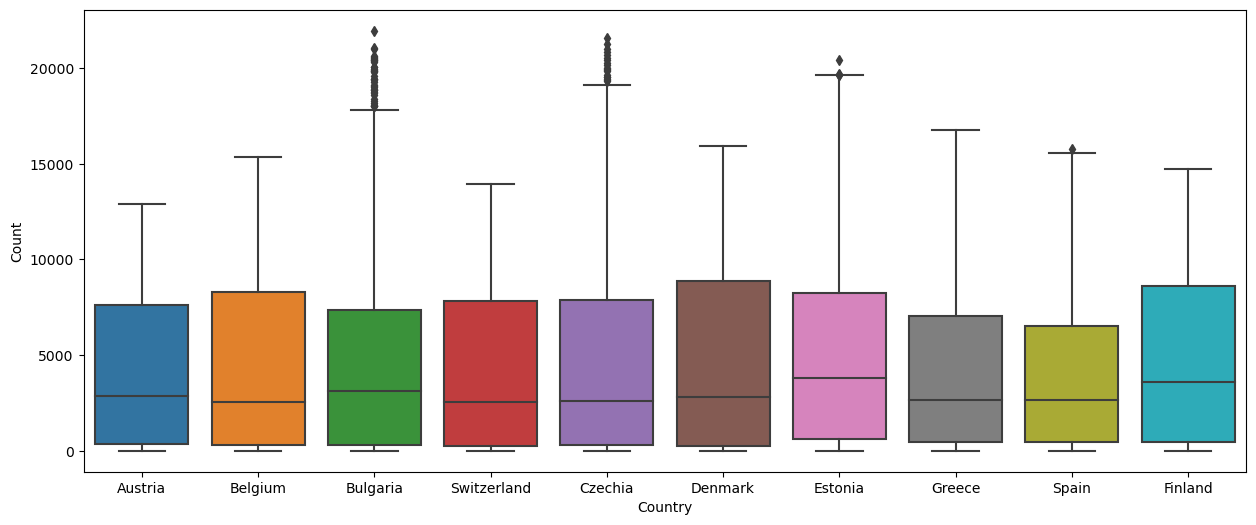

In [221]:
def boxplot_analise(df, n=10):
    country = df['Country'].unique()
    paises_filtrados = df[df['Country'].isin(country[:n])]
    ax = sns.boxplot(x='Country', y='Count' ,data=paises_filtrados)
    ax.figure.set_size_inches(15,6)
    return ax

boxplot_analise(dados, n=10)

Analisando paises com outliers

In [222]:
def only_countries_with_outliers(df):
    outliers_indices = {}
    country_unique = df['Country'].unique()
    
    for country in country_unique:
        df_auxiliar = df[df['Country'] == country].copy()
        
        Q1 = df_auxiliar['Count'].quantile(0.25)
        Q3 = df_auxiliar['Count'].quantile(0.75)
    
        IQR = Q3 - Q1
    
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
    
        outliers = df_auxiliar[(df_auxiliar['Count'] < limite_inferior) | (df_auxiliar['Count'] > limite_superior)].index
        if len(outliers) > 0:
            outliers_indices[country] = outliers
    
    dados_with_outliers = list(outliers_indices.keys())
    dados_with_outliers = df[df['Country'].isin(dados_with_outliers)]
    
    return dados_with_outliers

dados_with_outliers = only_countries_with_outliers(dados)

Boxplot dos paises com outliers

<Axes: xlabel='Country', ylabel='Count'>

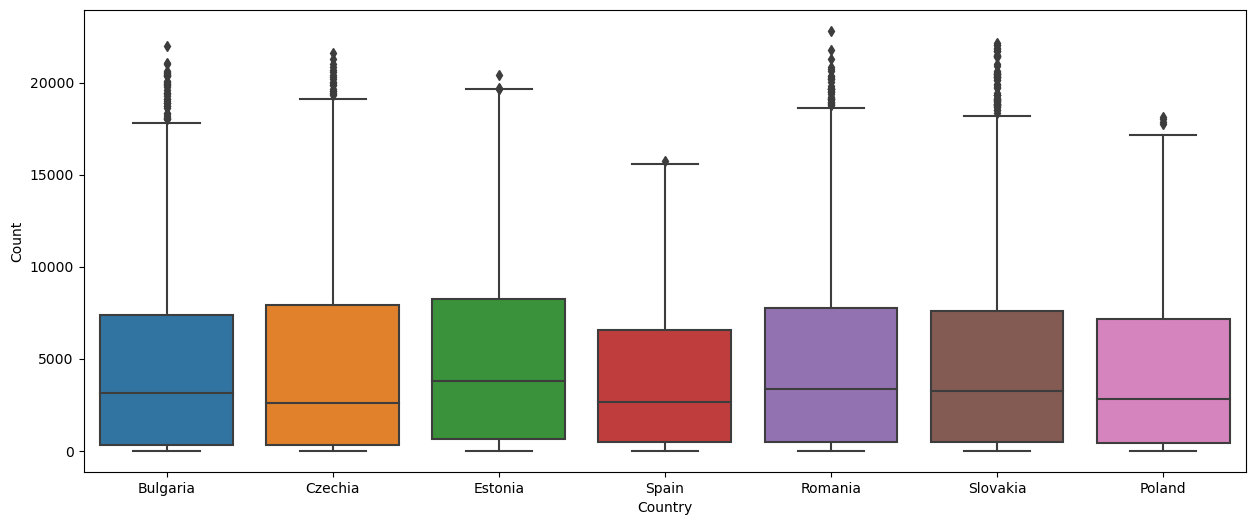

In [223]:
def boxplot_countries_outliers(df):
    ax = sns.boxplot(x='Country', y='Count' ,data=df)
    ax.figure.set_size_inches(15,6)
    return ax

boxplot_countries_outliers(dados_with_outliers)

Retirando esses paises do modelo

In [225]:
def dados_without_countries_outliers(df, df_countries):
    countries = df_countries['Country'].unique()
    df = df[~df['Country'].isin(countries)]
    return df
        
dados = dados_without_countries_outliers(dados, dados_with_outliers)

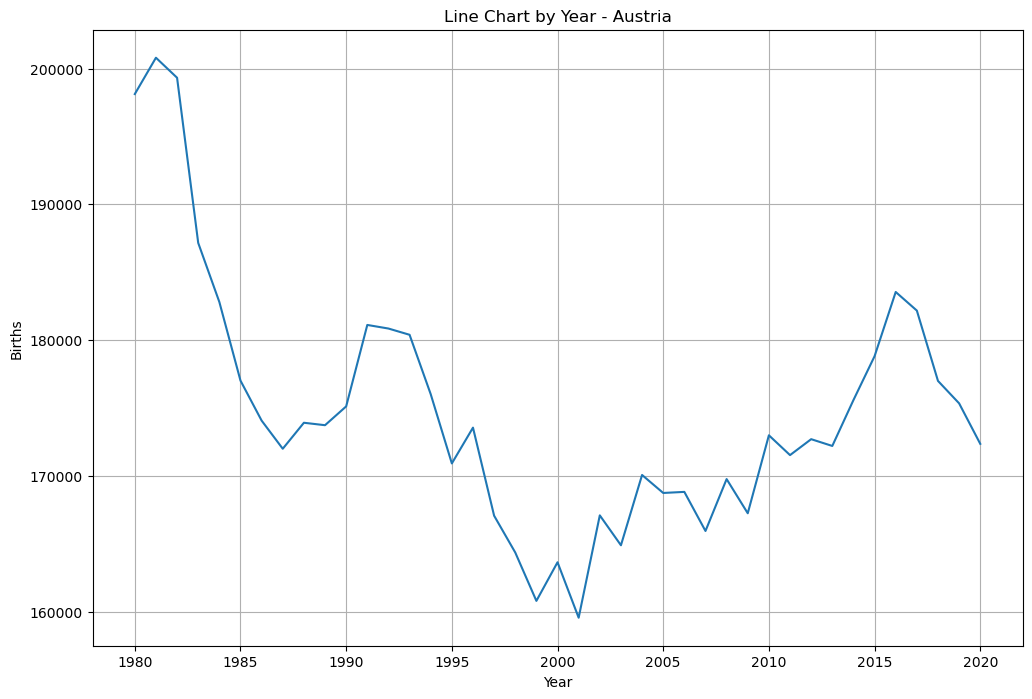

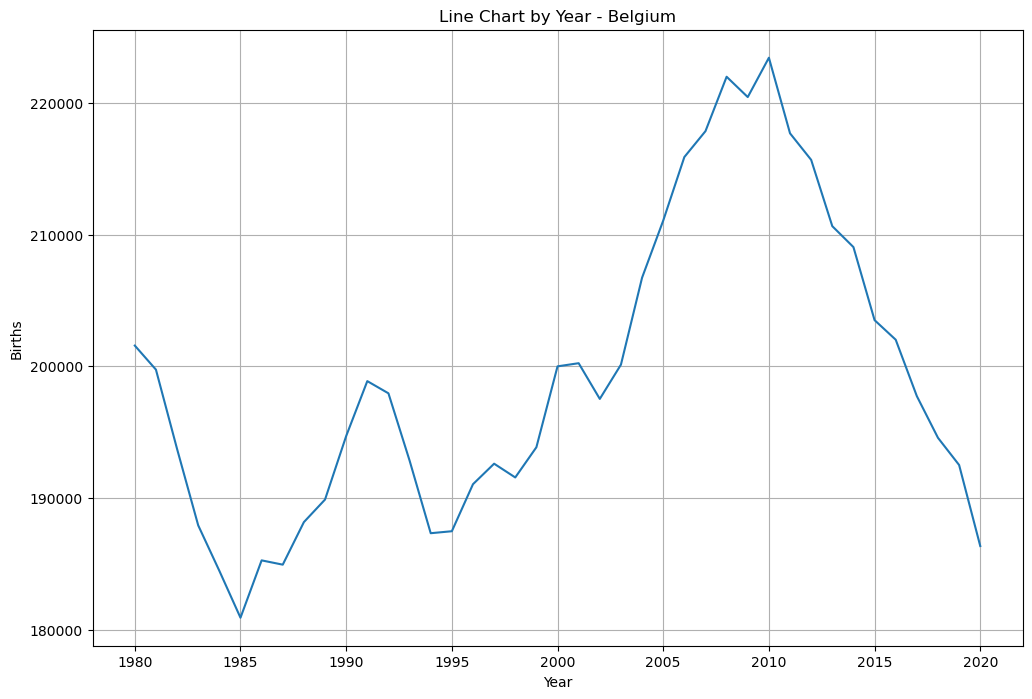

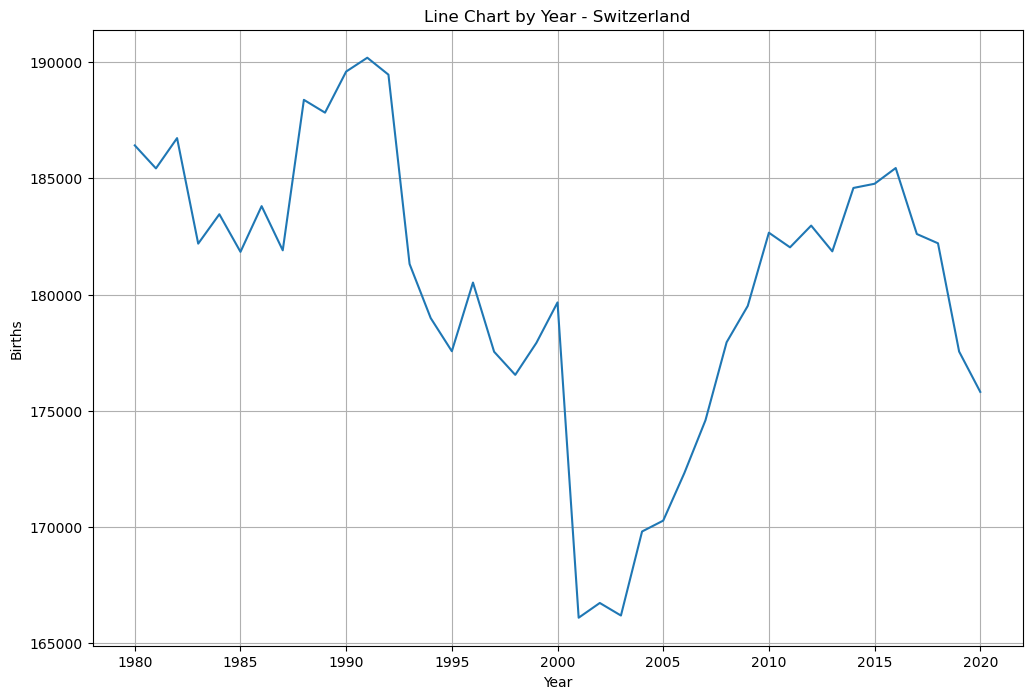

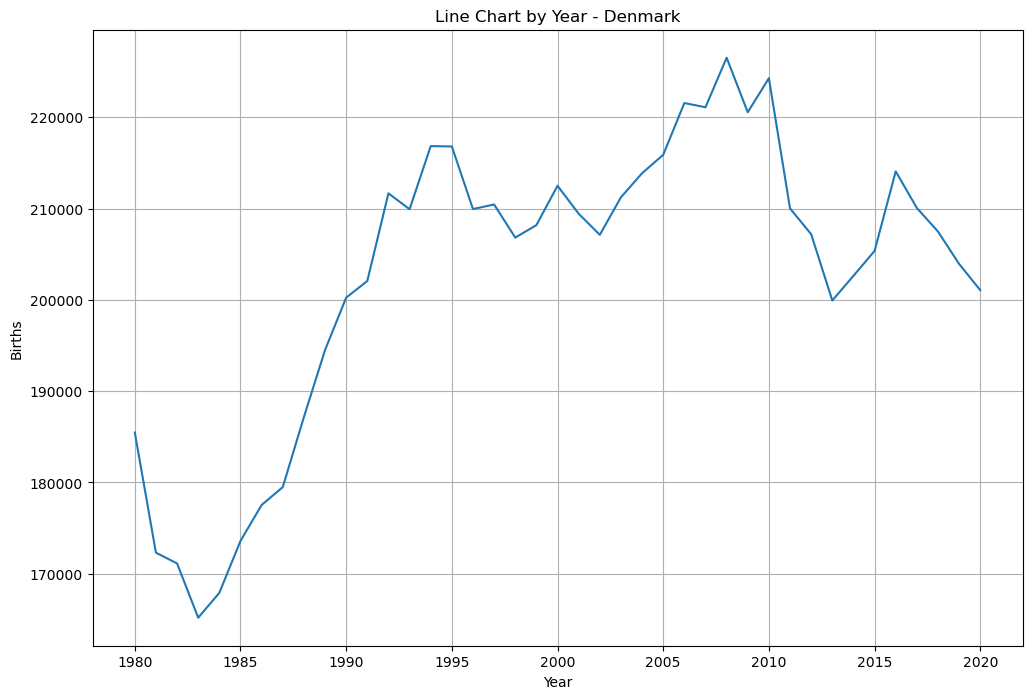

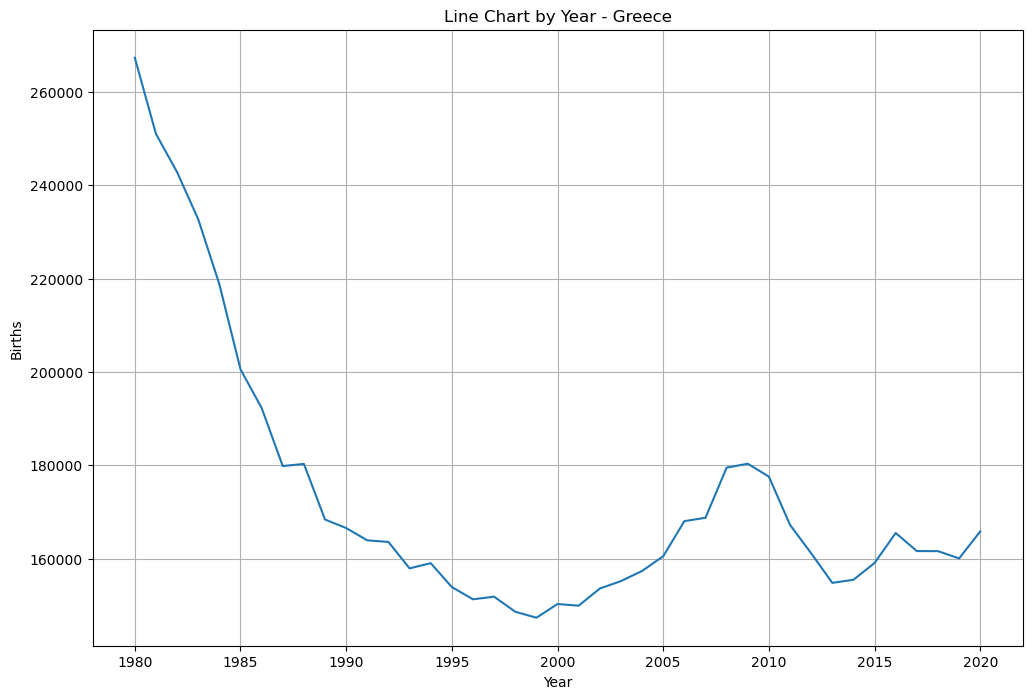

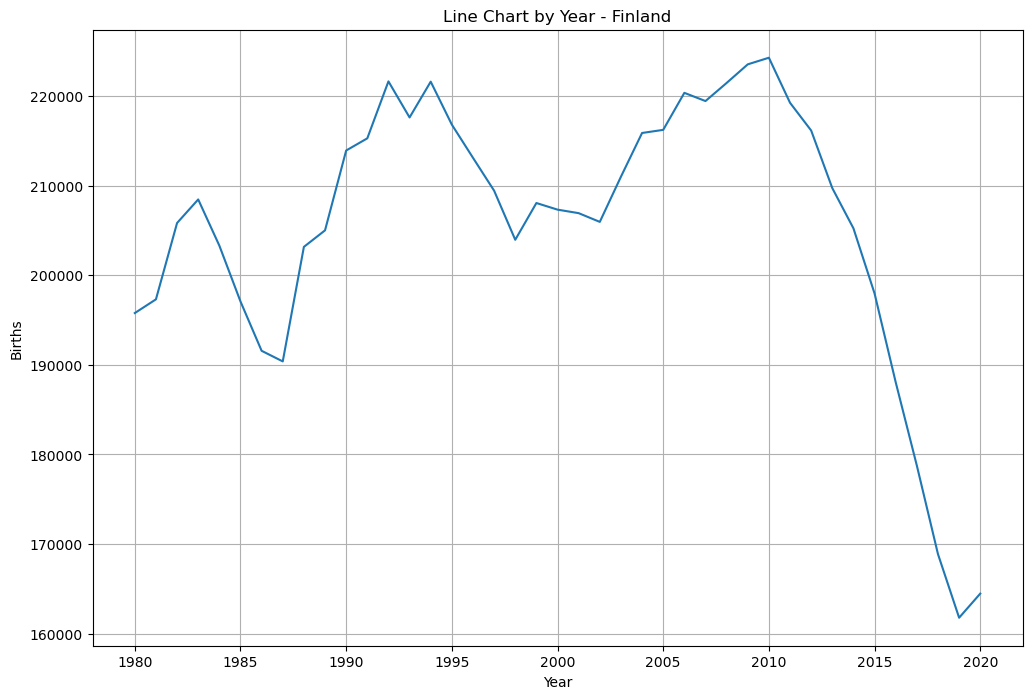

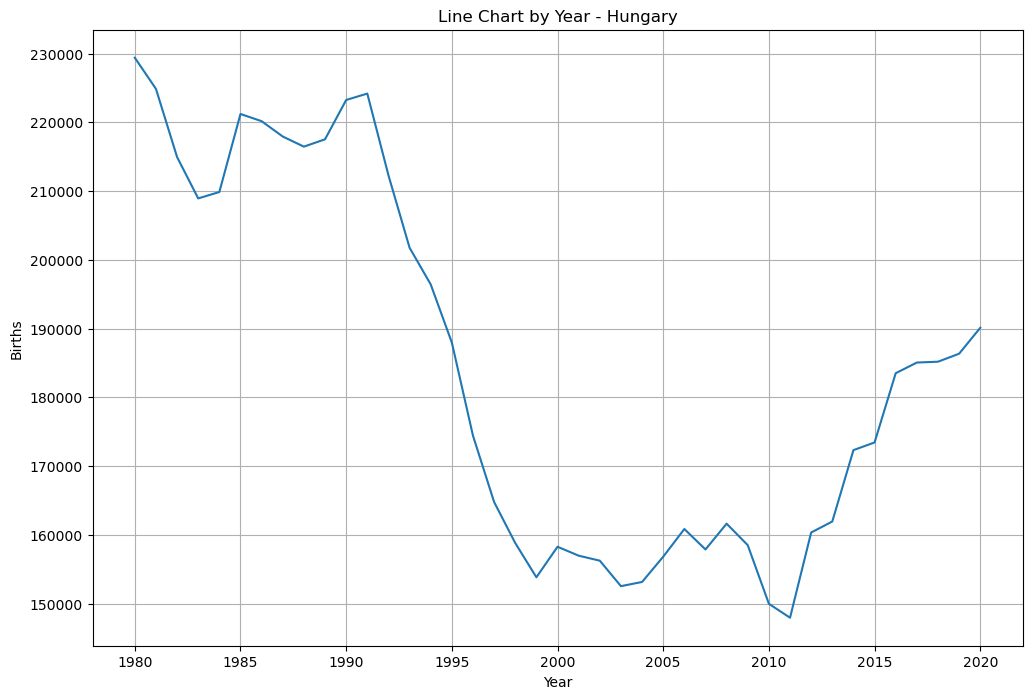

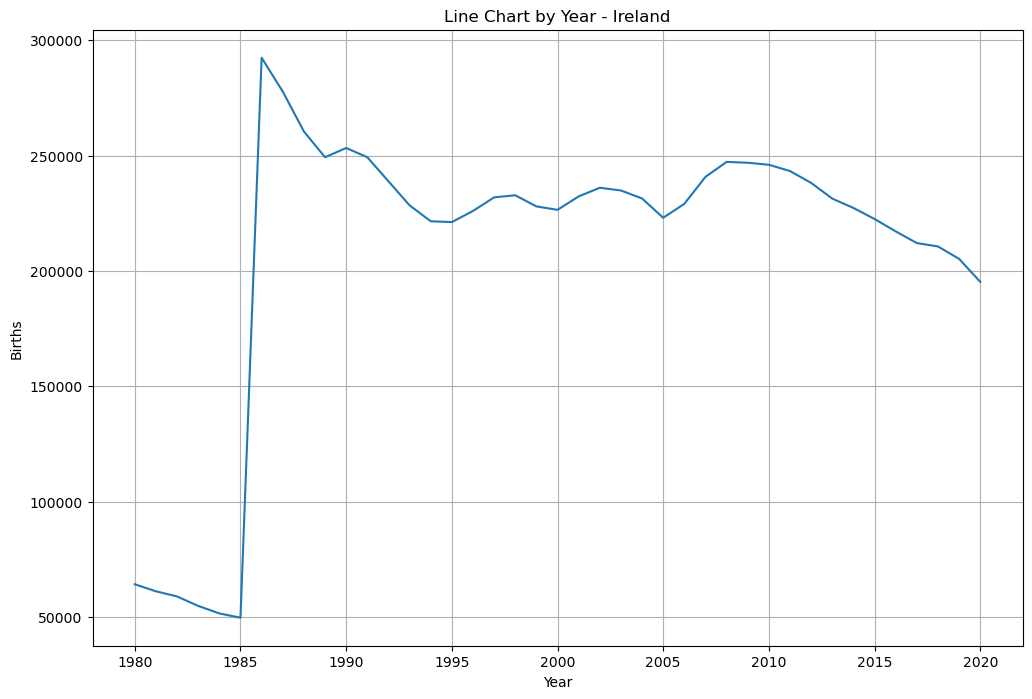

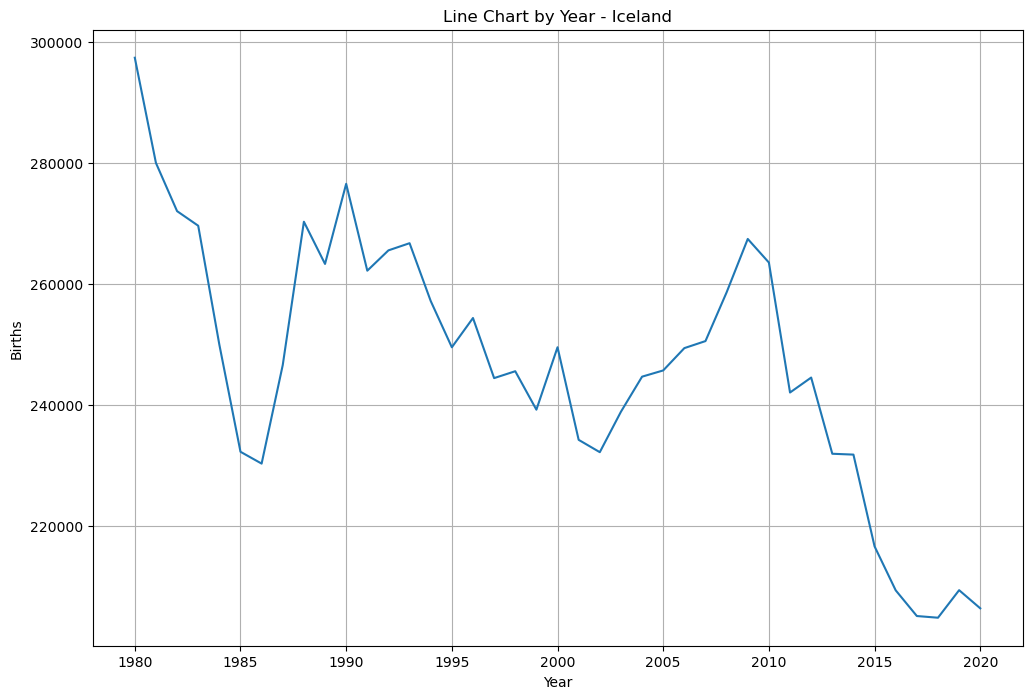

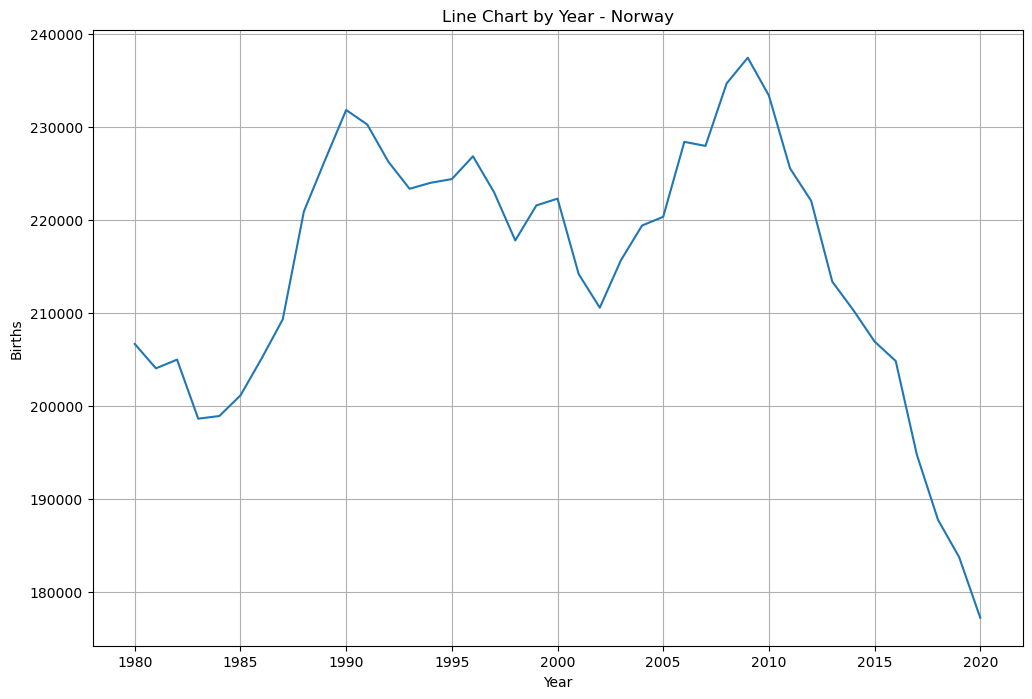

In [227]:
def plot_by_country_with_outlier(df, start=0, stop=10):
    countries = df['Country'].unique()
    countries = countries[start:stop]
    for country in countries:
        df_country = df[df['Country'] == country]
        grouped = df_country.groupby('Year')['Count'].sum()
    
        plt.figure(figsize=(12, 8))
        plt.plot(grouped.index, grouped.values)
    
        plt.title(f'Line Chart by Year - {country}')
        plt.xlabel('Year')
        plt.ylabel('Births')
        plt.grid(True)
        plt.show()

plot_by_country_with_outlier(dados, start=0, stop=10)

Irlanda parece ter uma distorção de dados antes de 1986, serão assim será retirado esses dados do modelo.

In [228]:
def chances_countrys(df, country, year):
    df['Count'] = df.apply(lambda row: None if (row['Country'] == country and row['Year']<year) else row['Count'], axis=1)
    df.dropna(axis=0, inplace=True)
    return df
    
dados = chances_countrys(dados, "Ireland", 1986)

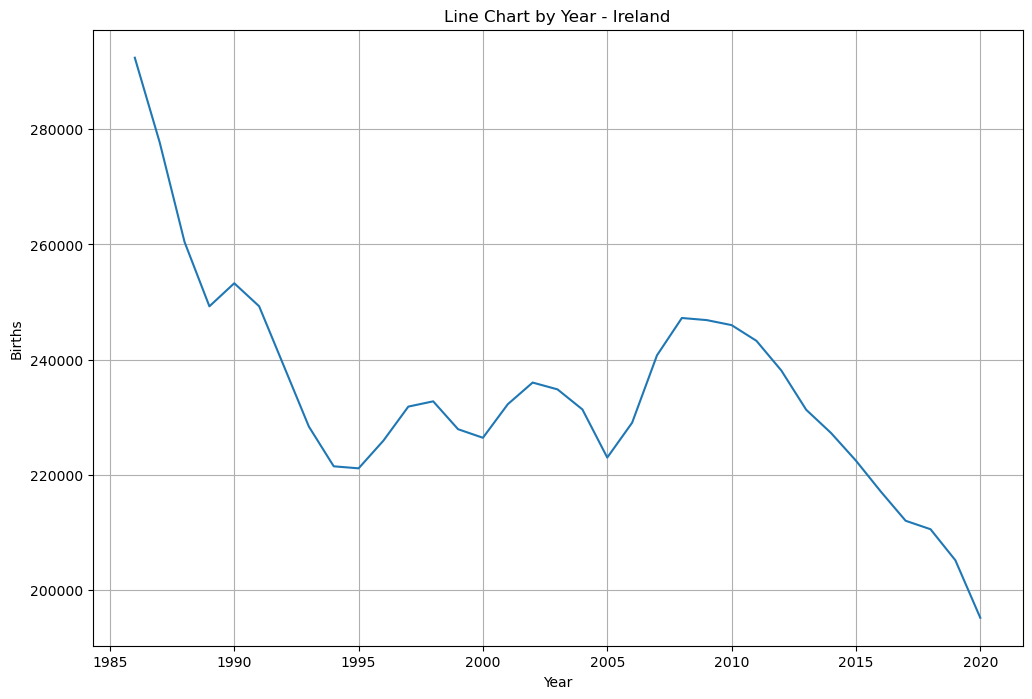

In [229]:
def plot_linha(df):
    country = df['Country'].iloc[0]
    grouped = df.groupby('Year')['Count'].sum()
    
    plt.figure(figsize=(12, 8))
    plt.plot(grouped.index, grouped.values)
    plt.title(f'Line Chart by Year - {country}')
    plt.xlabel('Year')
    plt.ylabel('Births')
    plt.grid(True)
    plt.show()
    
plot_linha(dados.query('Country == "Ireland"'))

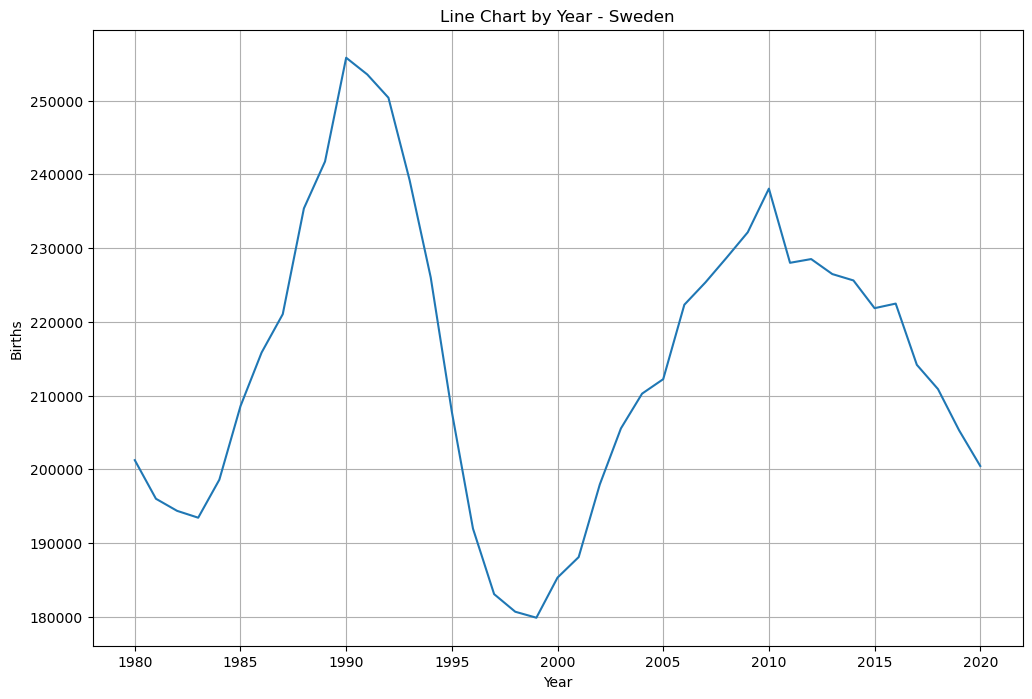

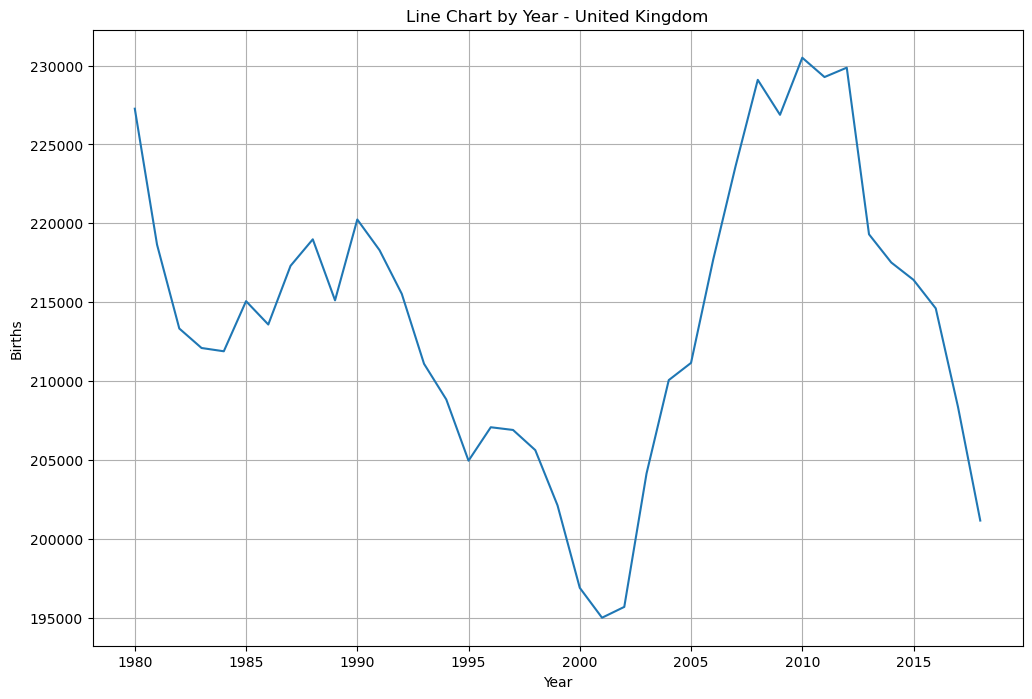

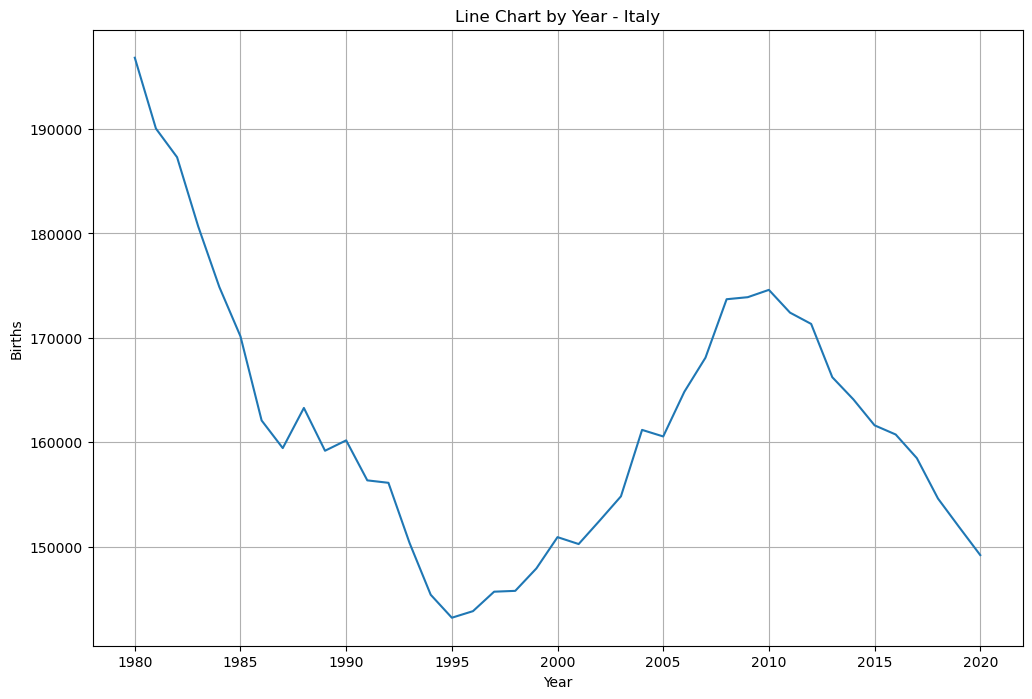

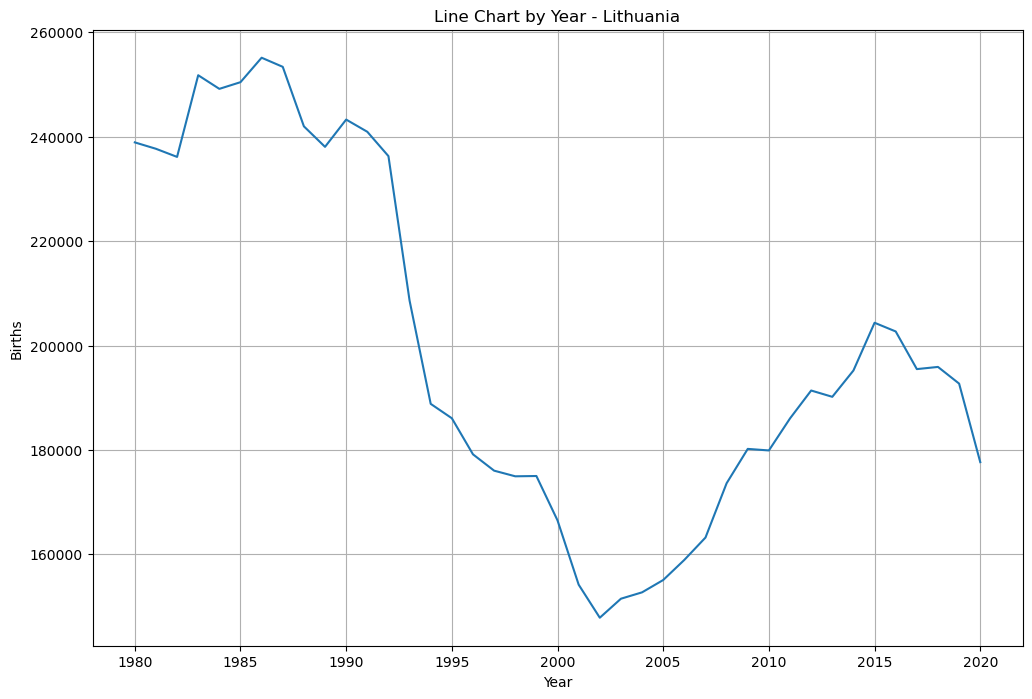

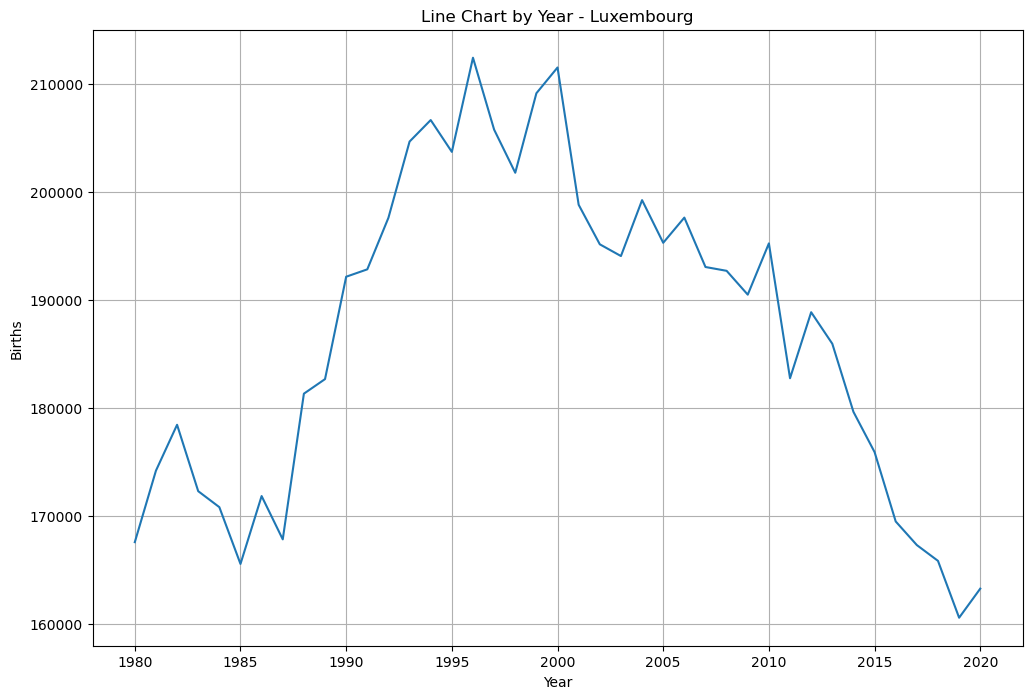

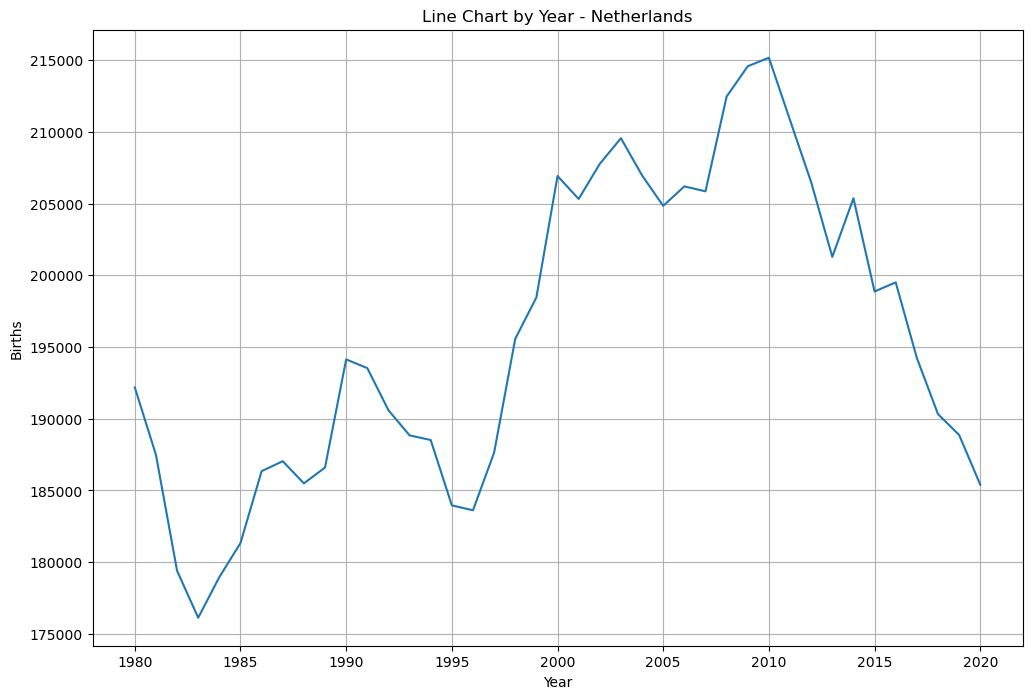

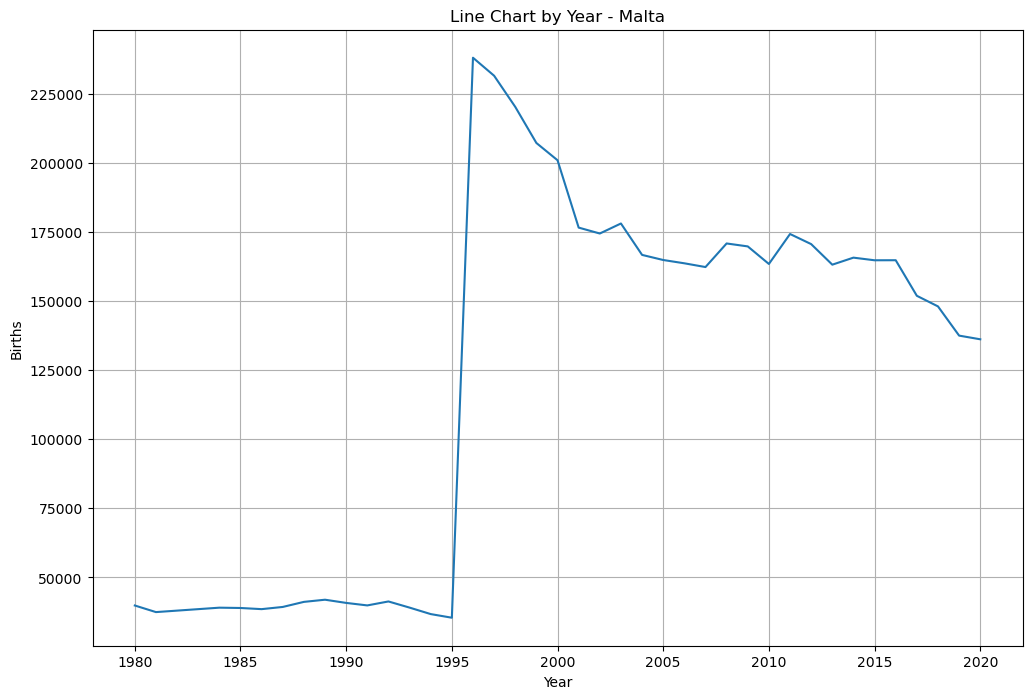

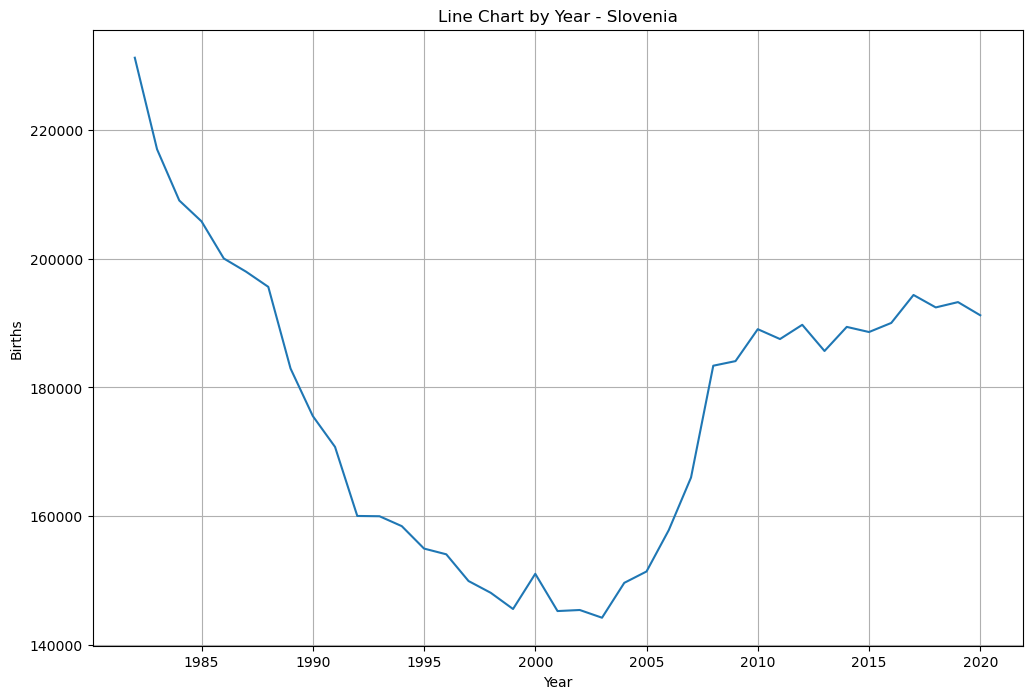

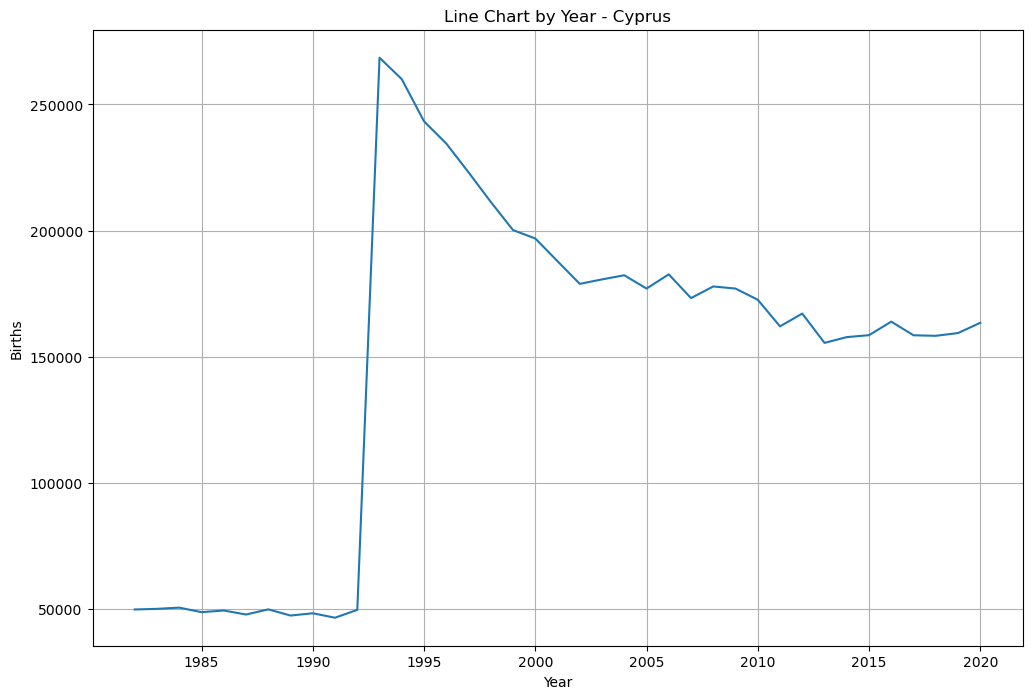

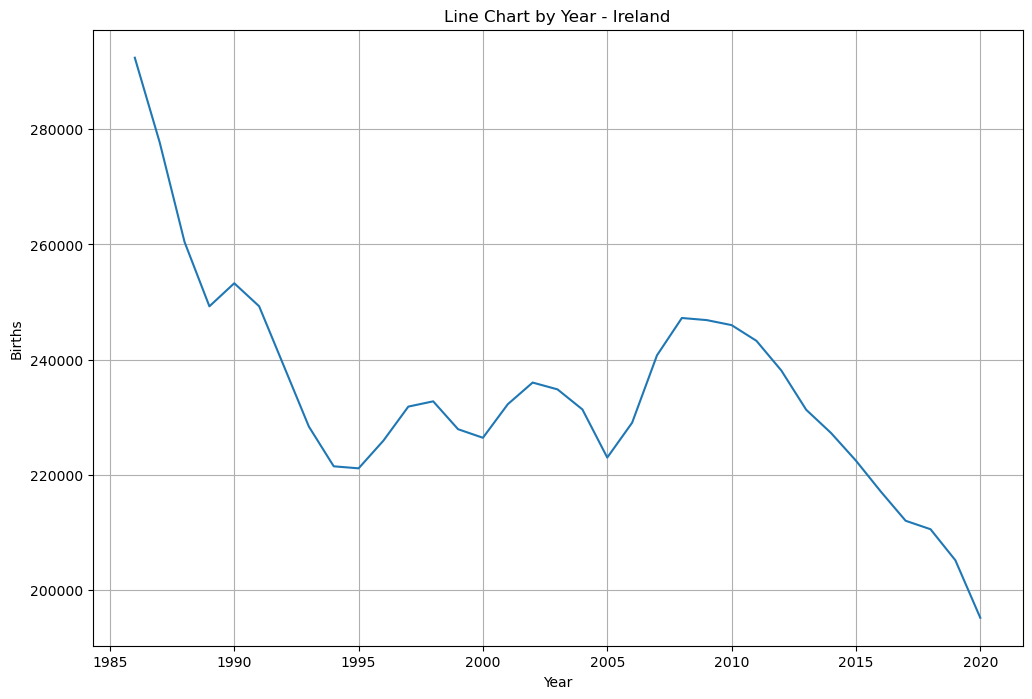

In [230]:
plot_by_country_with_outlier(dados, start=10, stop=20)

Malta e Cyprus apresentam distorções

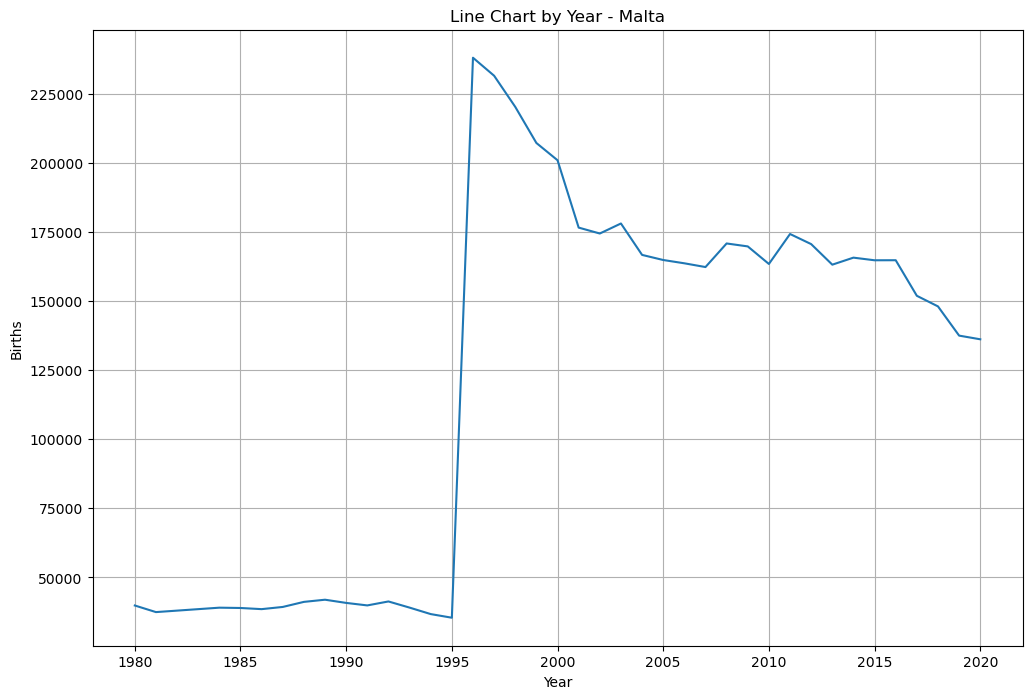

In [231]:
plot_linha(dados.query('Country == "Malta"'))

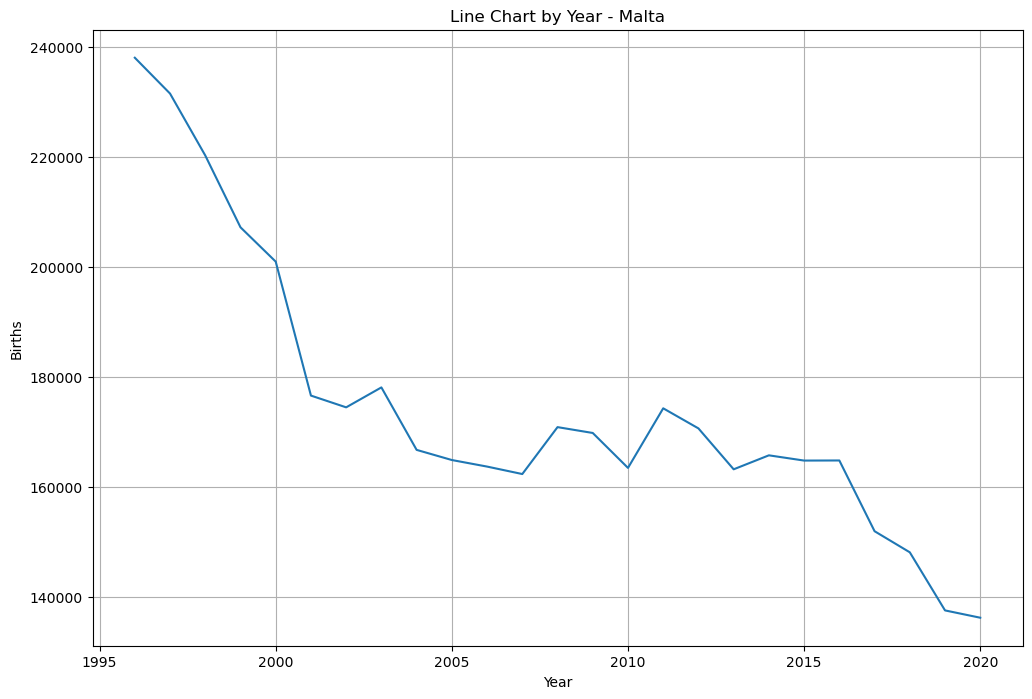

In [232]:
dados = chances_countrys(dados, "Malta", 1996)
plot_linha(dados.query('Country == "Malta"'))

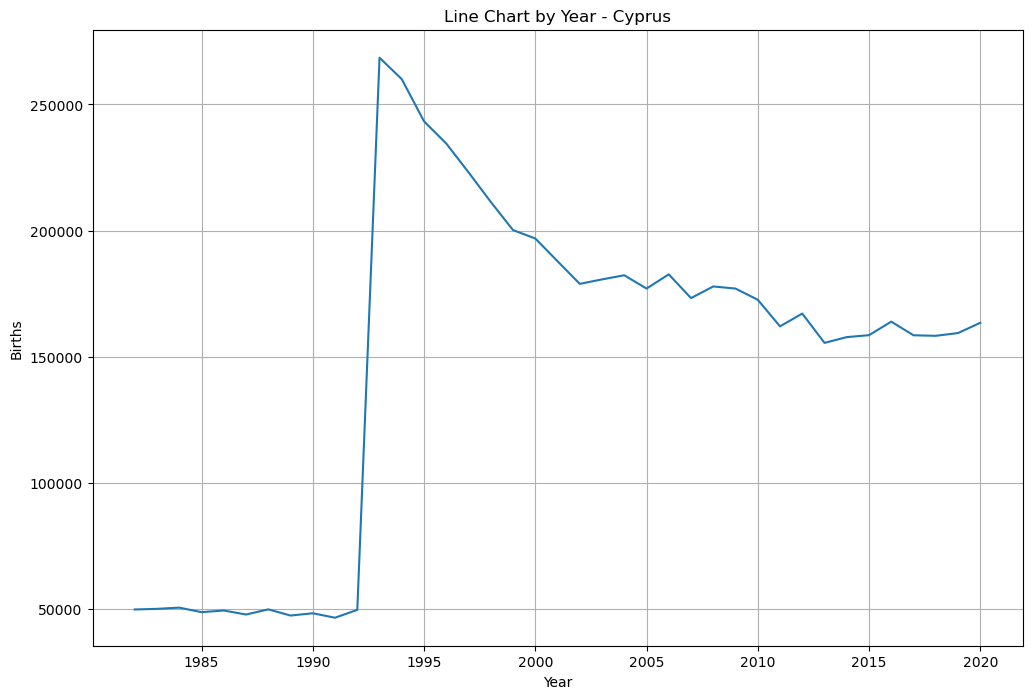

In [233]:
plot_linha(dados.query('Country == "Cyprus"'))

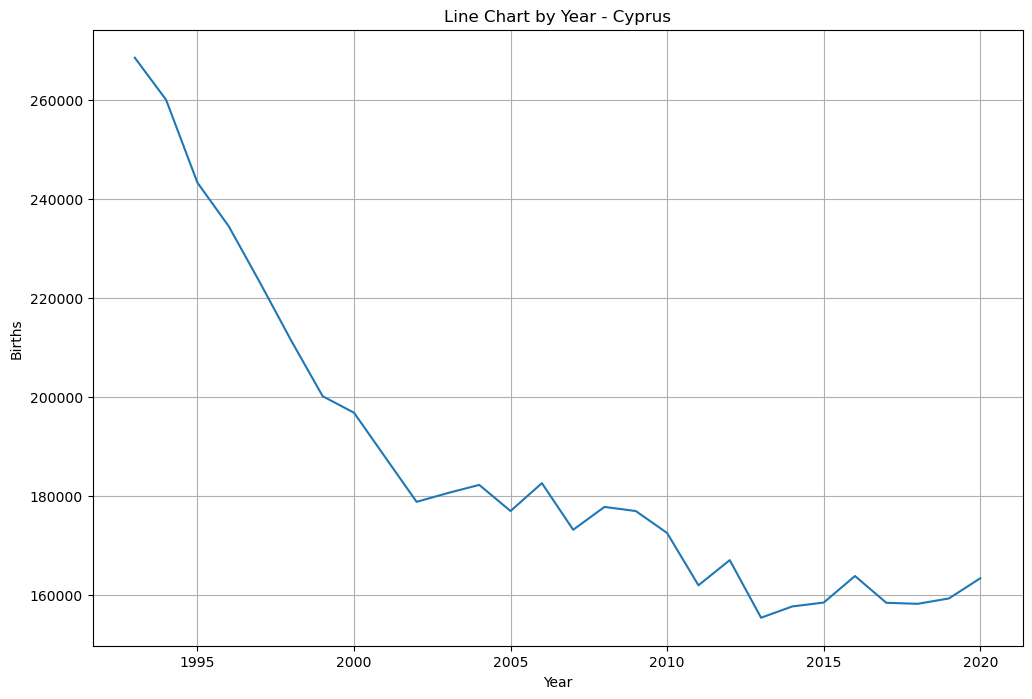

In [234]:
dados = chances_countrys(dados, "Cyprus", 1993)
plot_linha(dados.query('Country == "Cyprus"'))

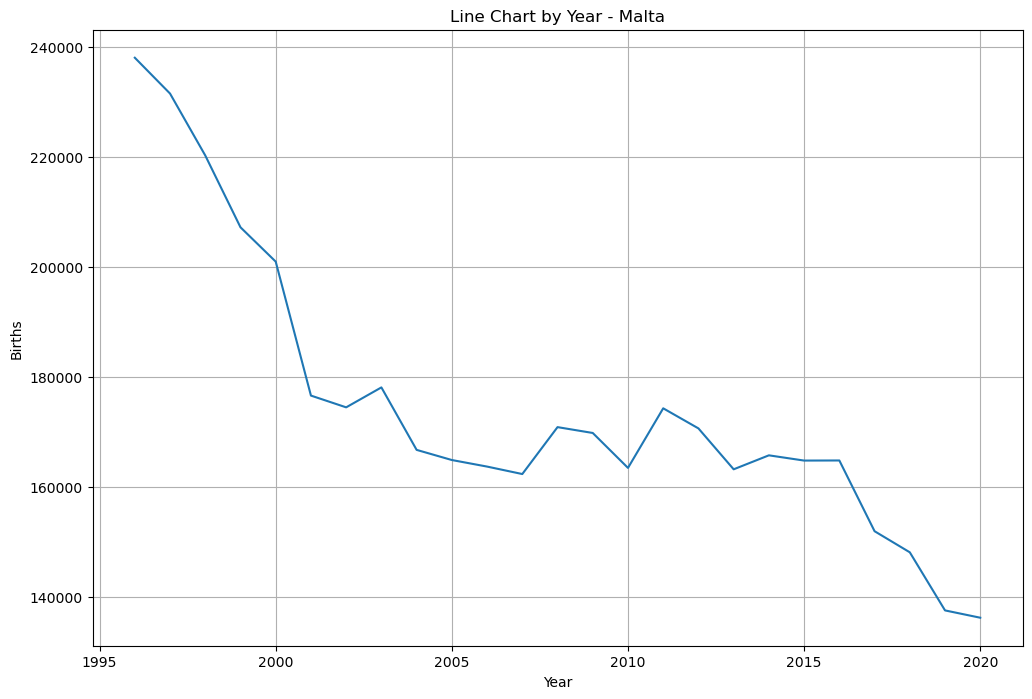

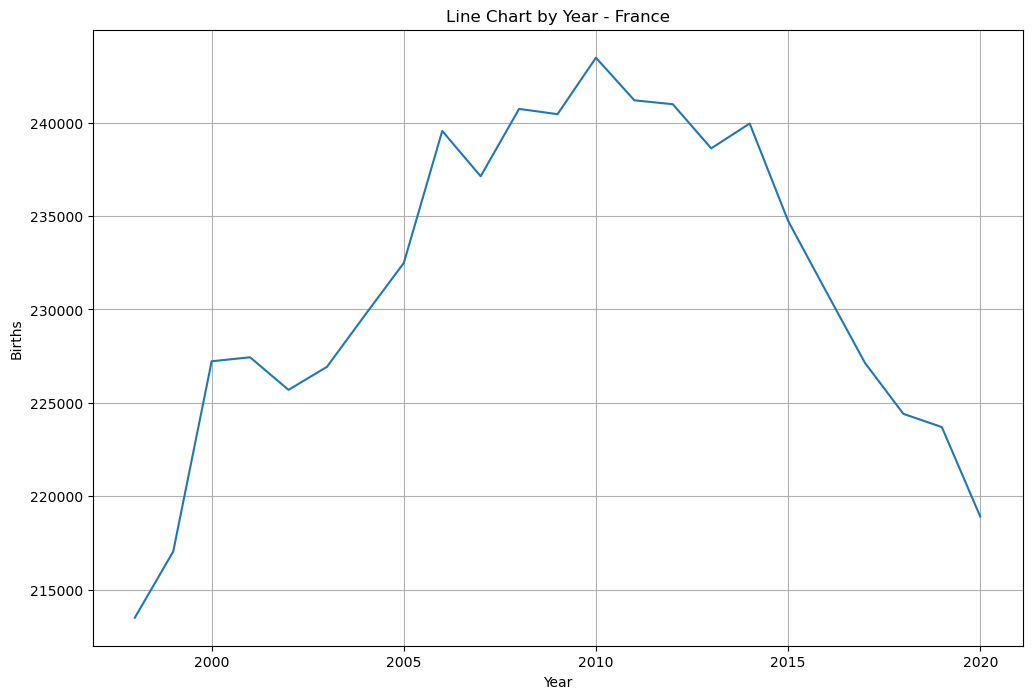

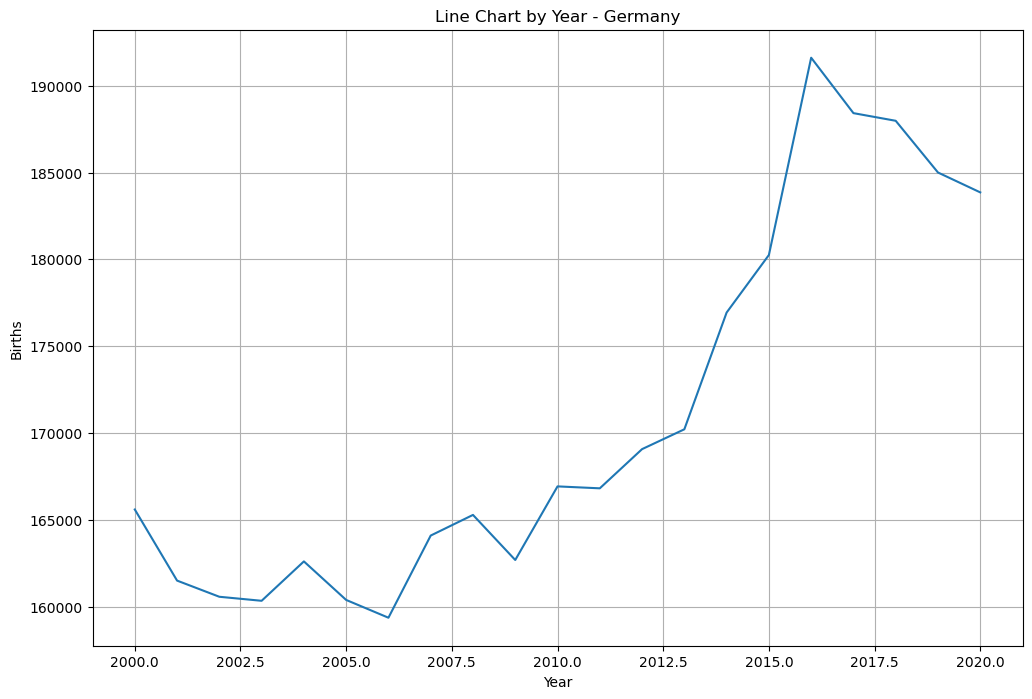

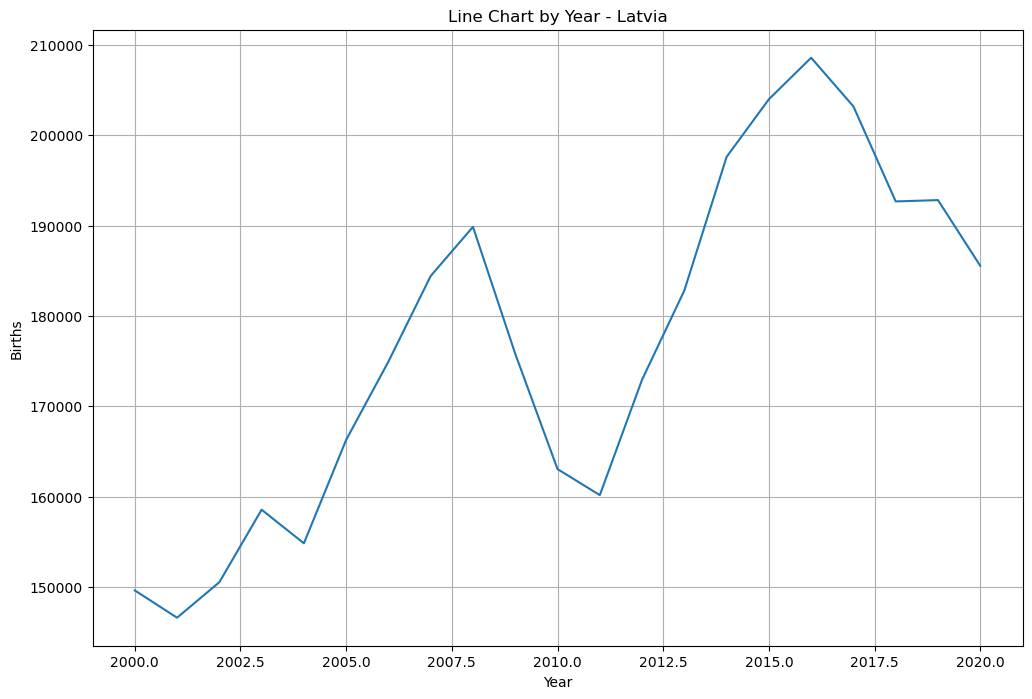

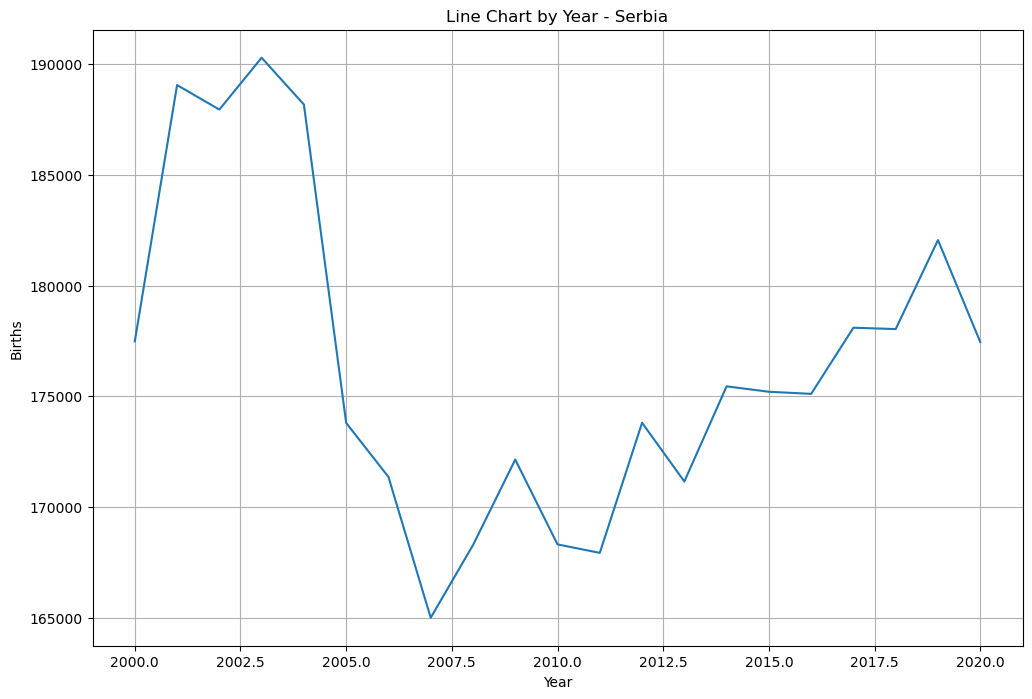

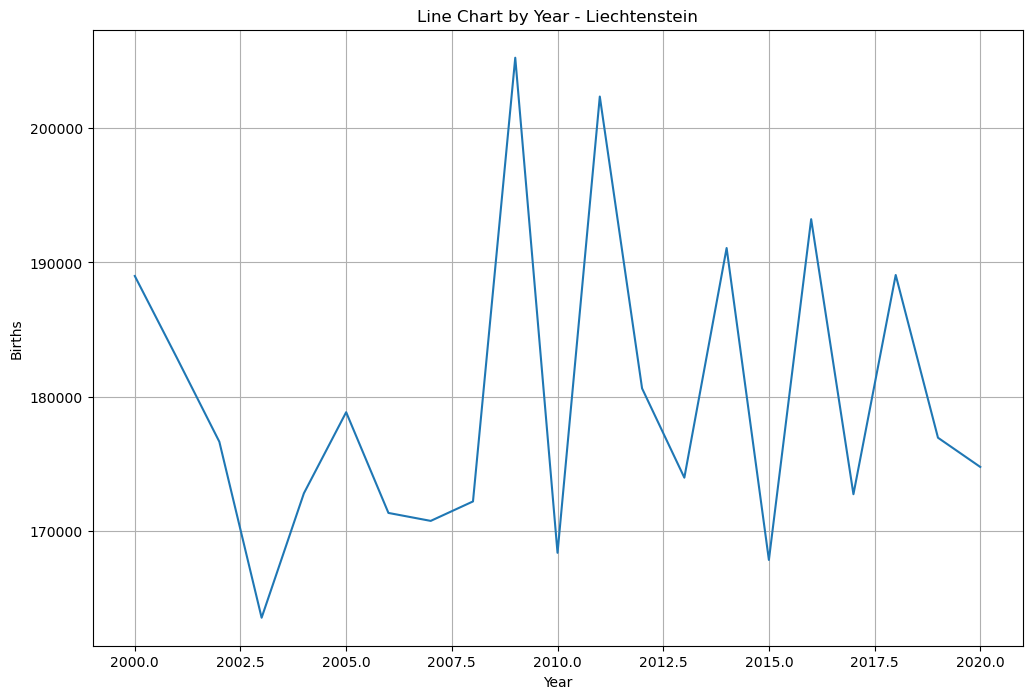

In [237]:
plot_by_country_with_outlier(dados, start=20, stop=(len(dados.Country.unique())+1))

In [238]:
dados.to_csv('PowerBi/Fertility_1960-2020.csv', index=False)